### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

#### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [100]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [101]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [102]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [103]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [104]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [105]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [106]:
X_st = X.copy()
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1, -1,  0,  0],
       [ 1,  0,  1,  1],
       [ 1,  2,  2,  1],
       [ 1,  0, -1,  0],
       [ 1,  0,  0,  0]])

In [107]:
X_st_norm = X_norm.copy()
X_st_norm[:, 1] = standard_scale(X_st[:, 1])
X_st_norm[:, 2] = standard_scale(X_st[:, 2])
X_st_norm[:, 3] = standard_scale(X_st[:, 3])

X_st_norm

array([[ 1.        , -0.14285714, -0.26726124, -0.5       ],
       [ 1.        , -0.14285714, -0.26726124, -0.5       ],
       [ 1.        , -0.14285714, -0.26726124, -0.5       ],
       [ 1.        , -0.14285714, -0.26726124, -0.5       ],
       [ 1.        , -0.14285714, -0.26726124, -0.5       ],
       [ 1.        , -1.57142857, -0.26726124, -0.5       ],
       [ 1.        , -0.14285714,  1.06904497,  2.        ],
       [ 1.        ,  2.71428571,  2.40535118,  2.        ],
       [ 1.        , -0.14285714, -1.60356745, -0.5       ],
       [ 1.        , -0.14285714, -0.26726124, -0.5       ]])

In [117]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [118]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [119]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    return W

In [80]:
lambda_ = np.linspace(1e-5, 0.1, 100)
lambda_

array([1.000e-05, 1.020e-03, 2.030e-03, 3.040e-03, 4.050e-03, 5.060e-03,
       6.070e-03, 7.080e-03, 8.090e-03, 9.100e-03, 1.011e-02, 1.112e-02,
       1.213e-02, 1.314e-02, 1.415e-02, 1.516e-02, 1.617e-02, 1.718e-02,
       1.819e-02, 1.920e-02, 2.021e-02, 2.122e-02, 2.223e-02, 2.324e-02,
       2.425e-02, 2.526e-02, 2.627e-02, 2.728e-02, 2.829e-02, 2.930e-02,
       3.031e-02, 3.132e-02, 3.233e-02, 3.334e-02, 3.435e-02, 3.536e-02,
       3.637e-02, 3.738e-02, 3.839e-02, 3.940e-02, 4.041e-02, 4.142e-02,
       4.243e-02, 4.344e-02, 4.445e-02, 4.546e-02, 4.647e-02, 4.748e-02,
       4.849e-02, 4.950e-02, 5.051e-02, 5.152e-02, 5.253e-02, 5.354e-02,
       5.455e-02, 5.556e-02, 5.657e-02, 5.758e-02, 5.859e-02, 5.960e-02,
       6.061e-02, 6.162e-02, 6.263e-02, 6.364e-02, 6.465e-02, 6.566e-02,
       6.667e-02, 6.768e-02, 6.869e-02, 6.970e-02, 7.071e-02, 7.172e-02,
       7.273e-02, 7.374e-02, 7.475e-02, 7.576e-02, 7.677e-02, 7.778e-02,
       7.879e-02, 7.980e-02, 8.081e-02, 8.182e-02, 

In [120]:
W = []

In [121]:
for l in lambda_:
    W_n = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=l)
    W.append(W_n)
    print(W_n, l)
    

[52.01493934  8.11780106 -2.17885064 20.55249503] 1e-05
[52.00972816  8.09526446 -2.04690965 20.32697194] 0.00102
[52.00175824  8.07382656 -1.92905784 20.12848705] 0.00203
[51.98857262  8.05435808 -1.83756898 19.98077624] 0.00304
[51.97622218  8.03471112 -1.74221024 19.82537907] 0.00405
[51.96433782  8.01501563 -1.64482408 19.66586008] 0.00506
[51.94550439  7.99790097 -1.58245547 19.57385696] 0.00607
[51.93762435  7.97701564 -1.46566103 19.37640954] 0.0070799999999999995
[51.92511285  7.95788679 -1.37230167 19.22408412] 0.00809
[51.90932003  7.94003443 -1.29563047 19.10383553] 0.0091
[51.89879108  7.92042635 -1.19295335 18.93310547] 0.010110000000000001
[51.88431726  7.9023281  -1.11027629 18.80086014] 0.01112
[51.86602196  7.88569488 -1.04698109 18.70590582] 0.01213
[51.8564402   7.86607934 -0.94044063 18.52713828] 0.01314
[51.84014573  7.8489524  -0.86772357 18.41359163] 0.01415
[51.82513258  7.83147746 -0.78888985 18.28803303] 0.01516
[51.8090211   7.81449771 -0.71582676 18.17345119

Text(0.5, 1.1, 'График зависимости весов признаков от lambda')

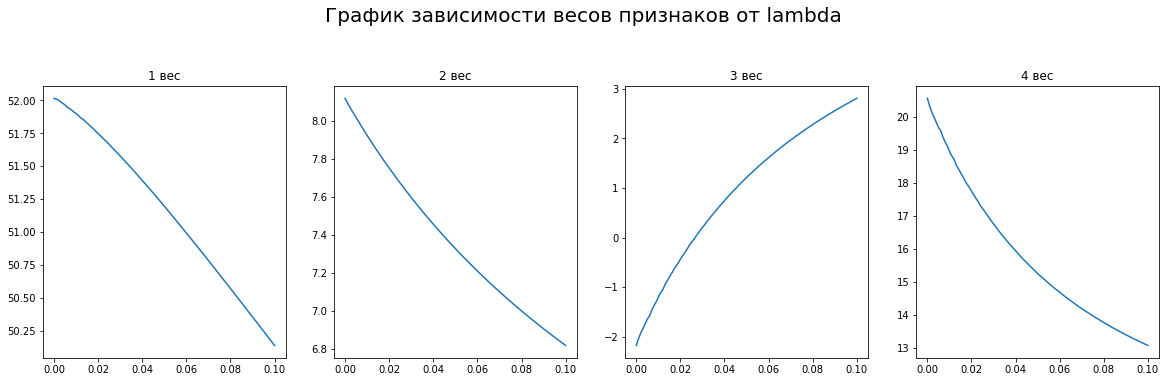

In [122]:
fig, ax = plt.subplots(nrows = 1, ncols = 4)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(lambda_, np.array(W)[:, 0])
ax1.set_title('1 вес')
ax2.plot(lambda_, np.array(W)[:, 1])
ax2.set_title('2 вес')
ax3.plot(lambda_, np.array(W)[:, 2])
ax3.set_title('3 вес')
ax4.plot(lambda_, np.array(W)[:, 3])
ax4.set_title('4 вес')
fig.set_size_inches(20, 5)
fig.suptitle('График зависимости весов признаков от lambda', y = 1.1, fontsize = 20)


###### C увеличением lambda значения весов по модулю уменьшаются

#### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [123]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W/abs(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [124]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-0.41332234  0.75968337  0.68825266 -0.08512817], error 3520.747319031808
Iter: 500, weights: [52.83827967  6.67112616  3.53133785 11.44717765], error 38.02759822326607
Iter: 1000, weights: [52.68814073  7.63589104  1.50741524 13.82817076], error 35.81561292873577
Iter: 1500, weights: [52.50832232  7.89182729  0.35285575 15.74139477], error 34.78575865583287
Iter: 2000, weights: [52.3638343   7.98333625 -0.42250061 17.17400747], error 34.24400027540946
Iter: 2500, weights: [52.25564578  8.03011349 -0.97421271 18.22692325], error 33.955829582544844
Iter: 3000, weights: [52.17612252  8.06008854 -1.3738703  18.99682889], error 33.80237639639188
Iter: 3500, weights: [52.11797339  8.08108717 -1.66488245 19.55895845], error 33.72064917813123
Iter: 4000, weights: [52.07551694  8.09622599 -1.87710207 19.96920968], error 33.677117657226106
Iter: 4500, weights: [52.04453151  8.10723403 -2.03192951 20.26858083], error 33.65392766061809
Final MSE: 33.64157163205449


array([52.0219591 ,  8.11524472, -2.1447076 , 20.48666034])

In [125]:
def gradient_descent_reg_l2_(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [126]:
gradient_descent_reg_l2_(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.90117055  0.9757325  -1.27441464  0.60221469], error 3414.756776834329
Iter: 500, weights: [52.76990101  6.89459938  2.93363082 12.27009189], error 37.23208439167782
Iter: 1000, weights: [52.62345954  7.69897445  1.14313762 14.46499756], error 35.44221171710605
Iter: 1500, weights: [52.45776024  7.91635861  0.10383589 16.21110048], error 34.59032630824997
Iter: 2000, weights: [52.32597156  7.99642855 -0.5990086  17.51484297], error 34.141069955822594
Iter: 2500, weights: [52.22755705  8.0383395  -1.1000264  18.47205324], error 33.90186092956718
Iter: 3000, weights: [52.15529817  8.06544284 -1.46299764 19.17150646], error 33.774305777407804
Iter: 3500, weights: [52.10249654  8.08448241 -1.72721043 19.68191588], error 33.706219677607805
Iter: 4000, weights: [52.06396568  8.09821559 -1.91980006 20.05422924], error 33.66982990279033
Iter: 4500, weights: [52.03585969  8.10819943 -2.06023795 20.32577912], error 33.65034685658038
Final MSE: 33.63989106012889


array([52.01539522,  8.11546178, -2.16248384, 20.5234929 ])

#### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Text(0.5, 1, 'Распределение данных')

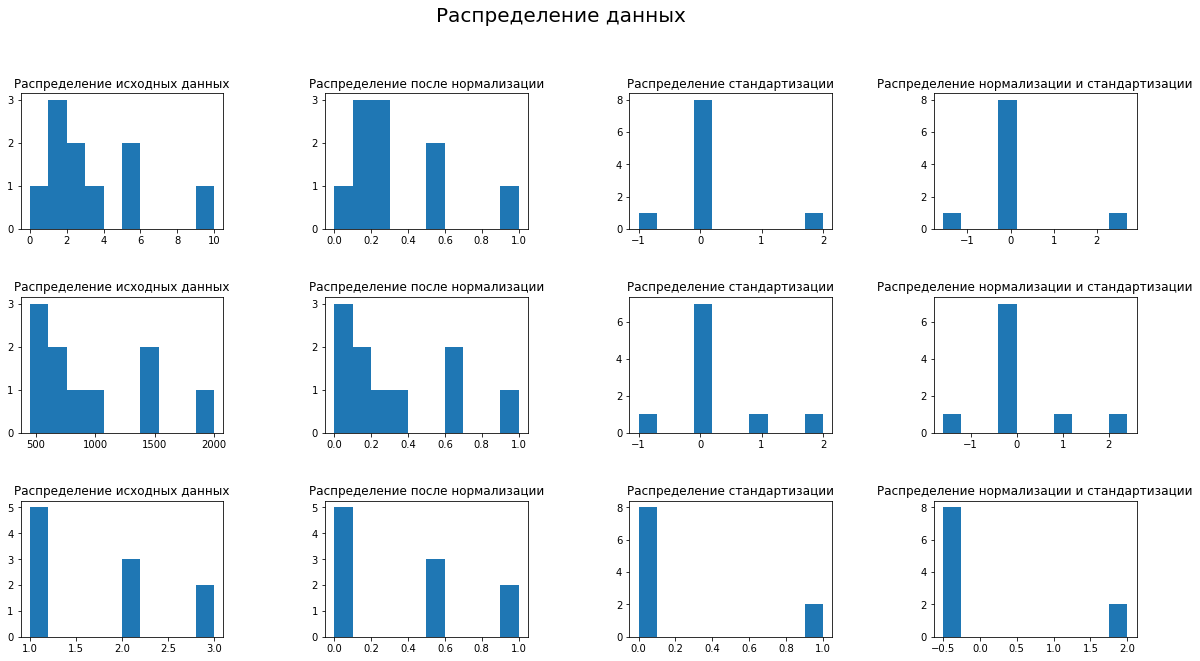

In [129]:
fig, ax = plt.subplots(nrows = 3, ncols = 4)
# ax[0,0], ax[0,1], ax[0,2], ax[0,3], ax[1,0], ax[1,1], ax[1,2], ax[1,3] = ax.flatten()
ax[0,0].hist(X[:, 1])
ax[0,0].set_title('Распределение исходных данных')
ax[0,1].hist(X_norm[:, 1])
ax[0,1].set_title('Распределение после нормализации')
ax[0,2].hist(X_st[:, 1])
ax[0,2].set_title('Распределение стандартизации')
ax[0,3].hist(X_st_norm[:, 1])
ax[0,3].set_title('Распределение нормализации и стандартизации')
ax[1,0].hist(X[:, 2])
ax[1,0].set_title('Распределение исходных данных')
ax[1,1].hist(X_norm[:, 2])
ax[1,1].set_title('Распределение после нормализации')
ax[1,2].hist(X_st[:, 2])
ax[1,2].set_title('Распределение стандартизации')
ax[1,3].hist(X_st_norm[:, 2])
ax[1,3].set_title('Распределение нормализации и стандартизации')
ax[2,0].hist(X[:, 3])
ax[2,0].set_title('Распределение исходных данных')
ax[2,1].hist(X_norm[:, 3])
ax[2,1].set_title('Распределение после нормализации')
ax[2,2].hist(X_st[:, 3])
ax[2,2].set_title('Распределение стандартизации')
ax[2,3].hist(X_st_norm[:, 3])
ax[2,3].set_title('Распределение нормализации и стандартизации')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle('Распределение данных', y = 1, fontsize = 20)


Применить можно, но данное действие скорее всего не принесет какой-либо пользы. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели).

#### 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [132]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

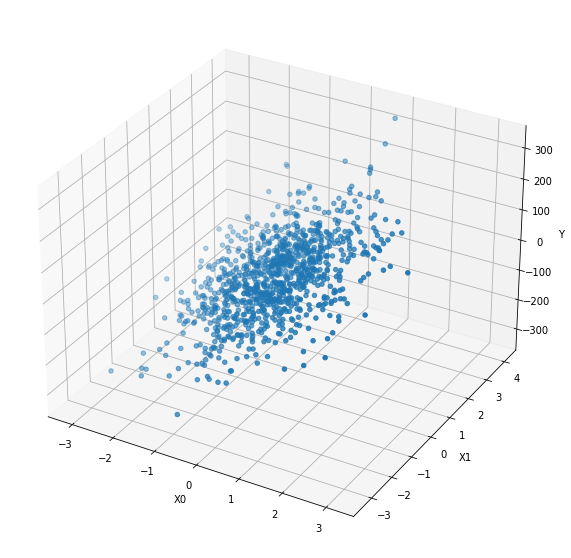

In [133]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [134]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [159]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_sgd = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num_sgd = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num_sgd < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(error)
    
#     if iter_num_sgd % 100 == 0:
    print(f'Iteration #{iter_num_sgd}: MSE = {round(error, 2)}')

    iter_num_sgd += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num_sgd}: error - {error}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: MSE = 8138.13
Iteration #1: MSE = 8070.67
Iteration #2: MSE = 8026.44
Iteration #3: MSE = 7893.33
Iteration #4: MSE = 7742.95
Iteration #5: MSE = 7596.23
Iteration #6: MSE = 7589.45
Iteration #7: MSE = 7496.21
Iteration #8: MSE = 6405.49
Iteration #9: MSE = 6030.27
Iteration #10: MSE = 5856.42
Iteration #11: MSE = 5414.25
Iteration #12: MSE = 5414.86
Iteration #13: MSE = 5350.59
Iteration #14: MSE = 5321.01
Iteration #15: MSE = 5123.11
Iteration #16: MSE = 5052.01
Iteration #17: MSE = 5038.4
Iteration #18: MSE = 4945.49
Iteration #19: MSE = 4925.17
Iteration #20: MSE = 4898.1
Iteration #21: MSE = 4863.8
Iteration #22: MSE = 4600.79
Iteration #23: MSE = 4317.2
Iteration #24: MSE = 4235.16
Iteration #25: MSE = 4214.22
Iteration #26: MSE = 4171.84
Iteration #27: MSE = 4150.08
Iteration #28: MSE = 3535.19
Iteration #29: MSE = 3414.42
Iteration #30: MSE = 3412.52
Iteration #31: MSE = 3409.29
Iteration #32: MSE = 3376.37
Iteration #33: MSE = 3319.12
Iteration #34: MSE = 3034.27

Iteration #478: MSE = 28.57
Iteration #479: MSE = 28.58
Iteration #480: MSE = 28.49
Iteration #481: MSE = 28.48
Iteration #482: MSE = 28.33
Iteration #483: MSE = 28.13
Iteration #484: MSE = 28.15
Iteration #485: MSE = 28.01
Iteration #486: MSE = 27.87
Iteration #487: MSE = 27.97
Iteration #488: MSE = 27.97
Iteration #489: MSE = 28.01
Iteration #490: MSE = 27.73
Iteration #491: MSE = 27.8
Iteration #492: MSE = 27.65
Iteration #493: MSE = 27.81
Iteration #494: MSE = 28.59
Iteration #495: MSE = 28.71
Iteration #496: MSE = 28.46
Iteration #497: MSE = 28.43
Iteration #498: MSE = 28.39
Iteration #499: MSE = 28.68
Iteration #500: MSE = 28.94
Iteration #501: MSE = 28.57
Iteration #502: MSE = 28.58
Iteration #503: MSE = 28.55
Iteration #504: MSE = 28.49
Iteration #505: MSE = 28.63
Iteration #506: MSE = 28.57
Iteration #507: MSE = 28.66
Iteration #508: MSE = 28.7
Iteration #509: MSE = 28.67
Iteration #510: MSE = 28.89
Iteration #511: MSE = 28.74
Iteration #512: MSE = 28.73
Iteration #513: MSE = 

Iteration #964: MSE = 27.39
Iteration #965: MSE = 27.4
Iteration #966: MSE = 27.57
Iteration #967: MSE = 27.59
Iteration #968: MSE = 27.48
Iteration #969: MSE = 27.41
Iteration #970: MSE = 27.21
Iteration #971: MSE = 27.03
Iteration #972: MSE = 27.15
Iteration #973: MSE = 26.7
Iteration #974: MSE = 26.69
Iteration #975: MSE = 26.56
Iteration #976: MSE = 26.56
Iteration #977: MSE = 26.55
Iteration #978: MSE = 26.82
Iteration #979: MSE = 26.84
Iteration #980: MSE = 26.84
Iteration #981: MSE = 26.68
Iteration #982: MSE = 26.72
Iteration #983: MSE = 26.77
Iteration #984: MSE = 26.78
Iteration #985: MSE = 27.02
Iteration #986: MSE = 27.01
Iteration #987: MSE = 26.88
Iteration #988: MSE = 26.92
Iteration #989: MSE = 26.84
Iteration #990: MSE = 26.89
Iteration #991: MSE = 26.87
Iteration #992: MSE = 26.89
Iteration #993: MSE = 26.94
Iteration #994: MSE = 26.92
Iteration #995: MSE = 26.96
Iteration #996: MSE = 27.0
Iteration #997: MSE = 26.87
Iteration #998: MSE = 26.87
Iteration #999: MSE = 2

In [160]:
%%time
# список векторов весов после каждой итерации
w_list_gd = [w.copy()]

# список значений ошибок после каждой итерации
errors_gd = []

# шаг градиентного спуска
# eta = 0.01

# максимальное число итераций
# max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
# min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
# weight_dist = np.inf
# счетчик итераций
iter_num_gd = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num_gd < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list_gd.append(new_w.copy())
    errors_gd.append(error)
    
    print(f'Iter {iter_num_gd}: error - {error}')
    
    iter_num_gd += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

Iter 0: error - 26.80248902836707
Iter 1: error - 26.787541703349802
Iter 2: error - 26.773187750992047
Iter 3: error - 26.759403612587292
Iter 4: error - 26.746166664904756
Iter 5: error - 26.733455183038696
Iter 6: error - 26.721248304732907
Iter 7: error - 26.709525996122768
Iter 8: error - 26.698269018837276
Iter 9: error - 26.687458898408284
Iter 10: error - 26.677077893933795
Iter 11: error - 26.667108968947147
Iter 12: error - 26.657535763441764
Iter 13: error - 26.648342567008427
Iter 14: error - 26.639514293038577
Iter 15: error - 26.63103645395221
Iter 16: error - 26.622895137410087
Iter 17: error - 26.615076983470342
Iter 18: error - 26.60756916265207
Iter 19: error - 26.60035935487122
Iter 20: error - 26.593435729211336
Iter 21: error - 26.586786924499503
Iter 22: error - 26.580402030652373
Iter 23: error - 26.574270570763908
Iter 24: error - 26.56838248390385
Iter 25: error - 26.56272810859974
Iter 26: error - 26.557298166974945
Iter 27: error - 26.552083749516203
Iter 28:

Iter 539: error - 26.4259048610015
Iter 540: error - 26.425904860996322
Iter 541: error - 26.425904860991334
Iter 542: error - 26.425904860986574
Iter 543: error - 26.425904860982
Iter 544: error - 26.425904860977624
Iter 545: error - 26.425904860973393
Iter 546: error - 26.42590486096937
Iter 547: error - 26.425904860965407
Iter 548: error - 26.42590486096172
Iter 549: error - 26.425904860958102
Iter 550: error - 26.42590486095463
Iter 551: error - 26.425904860951338
Iter 552: error - 26.42590486094814
Iter 553: error - 26.42590486094506
Iter 554: error - 26.425904860942165
Iter 555: error - 26.42590486093935
Iter 556: error - 26.425904860936587
Iter 557: error - 26.425904860934
Iter 558: error - 26.425904860931492
Iter 559: error - 26.42590486092908
Iter 560: error - 26.42590486092679
Iter 561: error - 26.425904860924543
Iter 562: error - 26.42590486092244
Iter 563: error - 26.42590486092037
Iter 564: error - 26.42590486091842
Iter 565: error - 26.425904860916546
Iter 566: error - 26

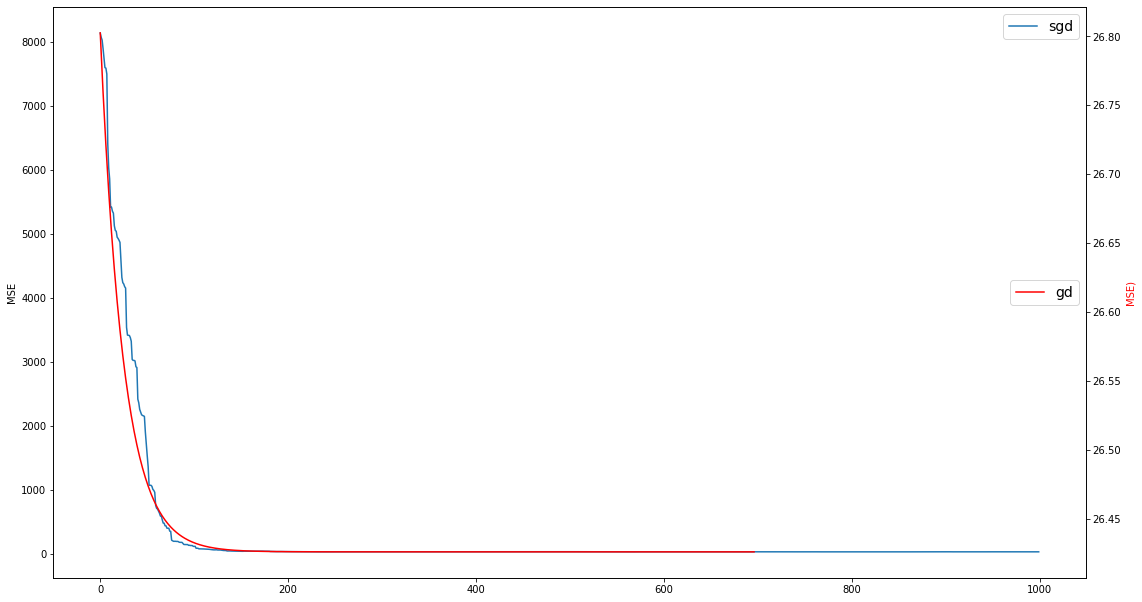

In [194]:
# Визуализируем изменение функционала ошибки
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(range(len(errors_sgd)), errors_sgd, label= 'sgd')
ax2.plot(range(len(errors_gd)), errors_gd, label = 'gd', color='red')
ax1.set_ylabel('MSE')
ax2.set_ylabel('MSE)', color='red')
ax1.legend(fontsize = 14)
ax2.legend(loc=5, fontsize = 14)

plt.show()

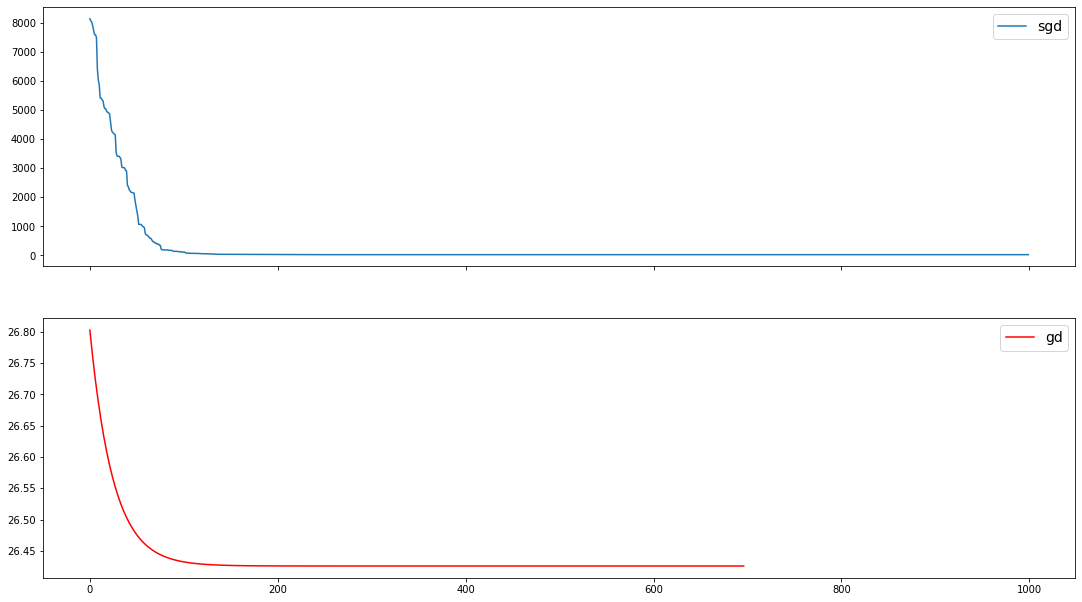

In [196]:
# Визуализируем изменение функционала ошибки
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(18.5, 10.5)
ax1.plot(range(len(errors_sgd)), errors_sgd, label= 'sgd')
ax2.plot(range(len(errors_gd)), errors_gd, label = 'gd', color='red')
ax1.legend(fontsize = 14)
ax2.legend(fontsize = 14)
plt.show()

Cтохастический градиентный спуск сходится дольше, чем классический градиентный спуск ввиду специфики метода. Но это касается только конткретного набора данных. Если данных будет значительно больше (многократно больше), то результат будет, скорее всего, обратным.  